In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from IPython.display import display 
from PIL import Image
import tensorflow as tf
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [2]:
# instantiate image data generator using various image augmentation. Seperate 10% of train data for validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=.1,
                                  horizontal_flip=True,
                                  featurewise_center=True,
                                featurewise_std_normalization=True,
                                rotation_range=20,
                                width_shift_range=0.2,
                                height_shift_range=0.2,) #included in our dependencies

In [3]:
# create data generator for train data

train_generator = train_datagen.flow_from_directory('flowers_sep/train/', # path to the data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                   subset='training')

# create data generator for validation data

validation_generator = train_datagen.flow_from_directory('flowers_sep/train/', # path to the data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=128,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                         subset='validation'
                                                        )

Found 3505 images belonging to 5 classes.
Found 387 images belonging to 5 classes.


In [5]:
# create model with various convolutional, pooling and dropout. 

model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',strides=(2,2),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32, (3, 3),padding ='same',activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3, 3),padding ='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding ='same',activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
__

In [6]:
# view model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)            

In [7]:
# complile the model, use Adam optimizer
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# calculation of steps per epoch
step_size_train = train_generator.n//train_generator.batch_size

In [9]:
# fit model using train generator and validation generator
history = model.fit_generator(generator = train_generator, 
                    steps_per_epoch = step_size_train, 
                    epochs = 10,validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 67s 2s/step - loss: 1.5584 - acc: 0.3068 - val_loss: 1.3473 - val_acc: 0.4367
Epoch 2/10
27/27 [==============================] - 51s 2s/step - loss: 1.3115 - acc: 0.4415 - val_loss: 1.1552 - val_acc: 0.4289
Epoch 3/10
27/27 [==============================] - 51s 2s/step - loss: 1.2398 - acc: 0.4625 - val_loss: 1.0019 - val_acc: 0.5220
Epoch 4/10
27/27 [==============================] - 49s 2s/step - loss: 1.1616 - acc: 0.5286 - val_loss: 1.0188 - val_acc: 0.5452
Epoch 5/10
27/27 [==============================] - 46s 2s/step - loss: 1.1253 - acc: 0.5375 - val_loss: 0.9221 - val_acc: 0.5891
Epoch 6/10
27/27 [==============================] - 51s 2s/step - loss: 1.0515 - acc: 0.5875 - val_loss: 0.9514 - val_acc: 0.5685
Epoch 7/10
27/27 [==============================] - 51s 2s/step - loss: 1.0476 - acc: 0.5874 - val_loss: 0.8742 - val_acc: 0.5711
Epoch 8/10
27/27 [==============================] - 46s 2s/step - loss: 0.9903 - acc: 0.62

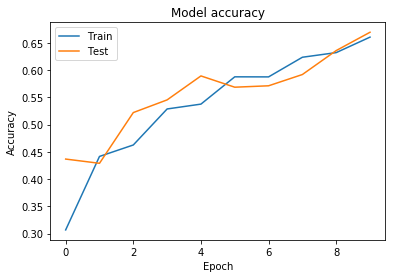

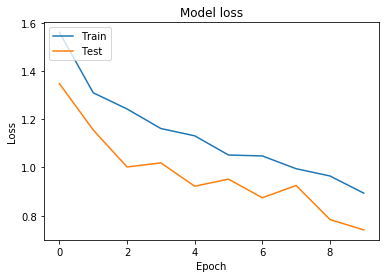

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
# instantiate test data generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
# fit test_generator with image data from test data folder
test_generator = test_datagen.flow_from_directory('flowers_sep/test/', # path to the data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=431,
                                                 class_mode='categorical',
                                                 shuffle=False,
                                                        )

Found 431 images belonging to 5 classes.


In [13]:
# evaluate test data using test_generator

model.evaluate_generator(test_generator)

[0.8079612255096436, 0.6774942]

In [14]:
# create prediction variable using predict_generator
predicts = model.predict_generator(test_generator)

In [15]:
# get the y variable labels
labels = test_generator.class_indices

# create dictionary with the index as the keys
labels = {y:x for x,y in labels.items()}
labels

{0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}

In [16]:
# Create X and y test variables
X_test, y_test = test_generator.next()

In [17]:
# see that X_test shape is appropriate
X_test.shape

(431, 224, 224, 3)

In [18]:
from sklearn.metrics import confusion_matrix

# create confusion matrix variable of confusion matrix based on Y_test and predictions
matrix = confusion_matrix(y_test.argmax(axis=1), predicts.argmax(axis=1))

In [30]:
# set matrix variable as a dataframe and display sorted classes as columns and index
df = pd.DataFrame(matrix,columns=list(labels.values()),index=list(labels.values()))
df

,daisy,dandelion,rose,sunflower,tulip
daisy,47,18,2,8,2
dandelion,4,85,1,12,3
rose,7,6,45,5,15
sunflower,1,6,0,61,5
tulip,2,9,23,10,54


In [32]:
from sklearn.metrics import classification_report

# print a classification report of the predicts and y_tests with the target names as the sorted classes
print(classification_report(y_test.argmax(axis=1), predicts.argmax(axis=1), target_names=list(labels.values())))

              precision    recall  f1-score   support

       daisy       0.77      0.61      0.68        77
   dandelion       0.69      0.81      0.74       105
        rose       0.63      0.58      0.60        78
   sunflower       0.64      0.84      0.72        73
       tulip       0.68      0.55      0.61        98

    accuracy                           0.68       431
   macro avg       0.68      0.68      0.67       431
weighted avg       0.68      0.68      0.67       431

